In [3]:
import tensorflow as tf
import numpy as np
from keras.datasets import cifar10

In [12]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')

# normalize
X_train = X_train / 255
X_test = X_test / 255

# Flatten the images to be compatible with a fully connected network
# X_train = X_train.reshape(X_train.shape[0], 32 * 32 * 3)
# X_test = X_test.reshape(X_test.shape[0], 32 * 32 * 3)

# one hot encode outputs
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
# Print the shape of X_train

print(X_train.shape)
print(y_train)

(50000, 32, 32, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
batch_size = 64
num_classes = 10
epochs = 5
input_shape = (32, 32, 3)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/5
704/704 [==============================] - 132s 186ms/step - loss: 1.7908 - acc: 0.3435 - val_loss: 1.4052 - val_acc: 0.4938
Epoch 2/5
704/704 [==============================] - 131s 186ms/step - loss: 1.4286 - acc: 0.4856 - val_loss: 1.1769 - val_acc: 0.5850
Epoch 3/5
704/704 [==============================] - 130s 185ms/step - loss: 1.2732 - acc: 0.5431 - val_loss: 1.0770 - val_acc: 0.6206
Epoch 4/5
704/704 [==============================] - 130s 185ms/step - loss: 1.1682 - acc: 0.5863 - val_loss: 1.0167 - val_acc: 0.6364
Epoch 5/5
704/704 [==============================] - 127s 180ms/step - loss: 1.0806 - acc: 0.6169 - val_loss: 0.9246 - val_acc: 0.6796


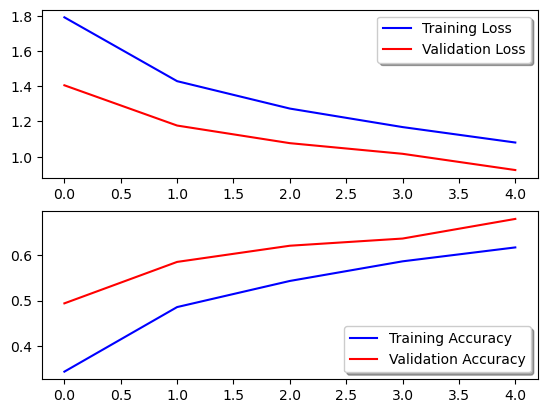

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)